# Exploring Historic Wildfire Data

This notebook explores historic wildfire data from 1878-2019

Data can be downloaded here: [Historic Wildfires](https://www.sciencebase.gov/catalog/item/5ee13de982ce3bd58d7be7e7)



In [50]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [25]:
# Load wildfire dataset
wf = gpd.read_file('../rawData/wildfire.geojson')

In [26]:
# Inspect data
wf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65845 entries, 0 to 65844
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    65845 non-null  object  
 1   FireCode    65845 non-null  object  
 2   FireYear    65845 non-null  int64   
 3   IgntDate    65845 non-null  object  
 4   ContrlDate  65845 non-null  object  
 5   ContnDate   65845 non-null  object  
 6   Acres       65845 non-null  float64 
 7   Hectares    65845 non-null  float64 
 8   DataSrc     65845 non-null  object  
 9   DataNotes   65845 non-null  object  
 10  FireCause   65845 non-null  object  
 11  FoundIn     65845 non-null  object  
 12  FndNames    65845 non-null  object  
 13  FndCodes    65845 non-null  object  
 14  FndDates    65845 non-null  object  
 15  FireQual    65845 non-null  int64   
 16  Shape_Leng  65845 non-null  float64 
 17  Shape_Area  65845 non-null  float64 
 18  geometry    65845 non-null  geometry
d

In [27]:
# View data as a table
wf.head()

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
0,414008,AK6535415457219840611,1984,1984-06-11T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,3169.156439,1282.513243,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414008,Alternate Fire Codes: AK6535415457219840611,"Alternate Ignition, Controlled, and Contained ...",1,22876.846278,1.282513e+07,"POLYGON ((-2729116.221 3783619.593, -2729145.4..."
1,414012,AK6621715235619840618,1984,1984-06-18T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,1964.386646,794.959774,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414012,Alternate Fire Codes: AK6621715235619840618,"Alternate Ignition, Controlled, and Contained ...",1,17290.576444,7.949598e+06,"POLYGON ((-2587275.964 3793164.935, -2587865.3..."
2,414057,AK6495716269319840702,1984,1984-07-02T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,1688.849283,683.453661,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414057,Alternate Fire Codes: AK6495716269319840702,"Alternate Ignition, Controlled, and Contained ...",1,11226.497241,6.834537e+06,"POLYGON ((-3073104.885 3996965.523, -3073150.9..."
3,414060,AK6379515502919840623,1984,1984-06-23T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,1399.226822,566.247506,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414060,Alternate Fire Codes: AK6379515502919840623,"Alternate Ignition, Controlled, and Contained ...",1,18047.888216,5.662475e+06,"POLYGON ((-2841528.411 3660892.172, -2841529.3..."
4,ABERT,OR4258812018119840809,1984,1984-08-09T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,7945.460289,3215.416542,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: Abert, Abert, ABERT","Alternate Fire Codes: M053, M053, OR4258812018...","Alternate Ignition, Controlled, and Contained ...",1,73017.681929,3.215417e+07,"POLYGON ((-1839066.540 551133.989, -1839017.70..."


In [77]:
# Avreage fire size (AC) per year
acYear = wf.groupby('FireYear').Acres.mean()

acYear

FireYear
1878    49323.898711
1889     9248.857692
1890     2844.077359
1893     5809.187171
1894    10274.898434
            ...     
2015     5350.126563
2016     2986.744162
2017     4246.361276
2018     3871.330894
2019     2826.651948
Name: Acres, Length: 128, dtype: float64

In [124]:
# Get mean fire size for each year in Wildfire Dataset, and assign it to a variable

fireYear = wf.groupby('FireYear').mean()

fireYear

fireAC = np.array(fireYear.Acres)

fireAC

array([49323.89871135,  9248.85769226,  2844.07735915,  5809.18717141,
       10274.89843392,  2558.5938689 ,  2964.96303917,  7932.99012229,
        1765.38333817,   649.07718968,   800.3009757 , 18409.88446172,
       15859.5941725 ,  1707.01234071,   915.82606945,   193.07935213,
        1270.33311469,   964.76304982, 10744.42925332,   807.20838591,
         596.63271976,  1205.56849956,  1160.7070768 ,   425.53530543,
         685.62753936,  1325.46761805,  1338.89540596,  3483.53594391,
         841.0439393 ,  1046.62220452,  1543.8345231 ,  1606.50049683,
        1787.13999259,   593.72896075,  2896.86312772,  1164.47775455,
        2507.42915814,  2383.59673404,   329.77885369,  1894.42264429,
        2049.23270921,   709.22414423,  1582.44393685,   649.18436427,
        1436.09341572,   222.45499973,   831.32326455,  1106.80117187,
         708.48514074,  1997.7806773 ,  1552.20302596,  1251.9279961 ,
        2051.46687277,  1301.03632215,   773.60036473,  1259.11627883,
      

In [125]:
# Create a list of years for plotting fire data

year = datetime.datetime.today().year
YEARS = [year - i for i in range(144)]
wfYears = YEARS[2:144]
wfYears

[2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995,
 1994,
 1993,
 1992,
 1991,
 1990,
 1989,
 1988,
 1987,
 1986,
 1985,
 1984,
 1983,
 1982,
 1981,
 1980,
 1979,
 1978,
 1977,
 1976,
 1975,
 1974,
 1973,
 1972,
 1971,
 1970,
 1969,
 1968,
 1967,
 1966,
 1965,
 1964,
 1963,
 1962,
 1961,
 1960,
 1959,
 1958,
 1957,
 1956,
 1955,
 1954,
 1953,
 1952,
 1951,
 1950,
 1949,
 1948,
 1947,
 1946,
 1945,
 1944,
 1943,
 1942,
 1941,
 1940,
 1939,
 1938,
 1937,
 1936,
 1935,
 1934,
 1933,
 1932,
 1931,
 1930,
 1929,
 1928,
 1927,
 1926,
 1925,
 1924,
 1923,
 1922,
 1921,
 1920,
 1919,
 1918,
 1917,
 1916,
 1915,
 1914,
 1913,
 1912,
 1911,
 1910,
 1909,
 1908,
 1907,
 1906,
 1905,
 1904,
 1903,
 1902,
 1901,
 1900,
 1899,
 1898,
 1897,
 1896,
 1895,
 1894,
 1893,
 1892,
 1891,
 1890,
 1889,
 1888,
 1887,
 1886,
 1885,
 1884,
 1883,
 1882,
 1881,
 1880,
 1879,
 1878]

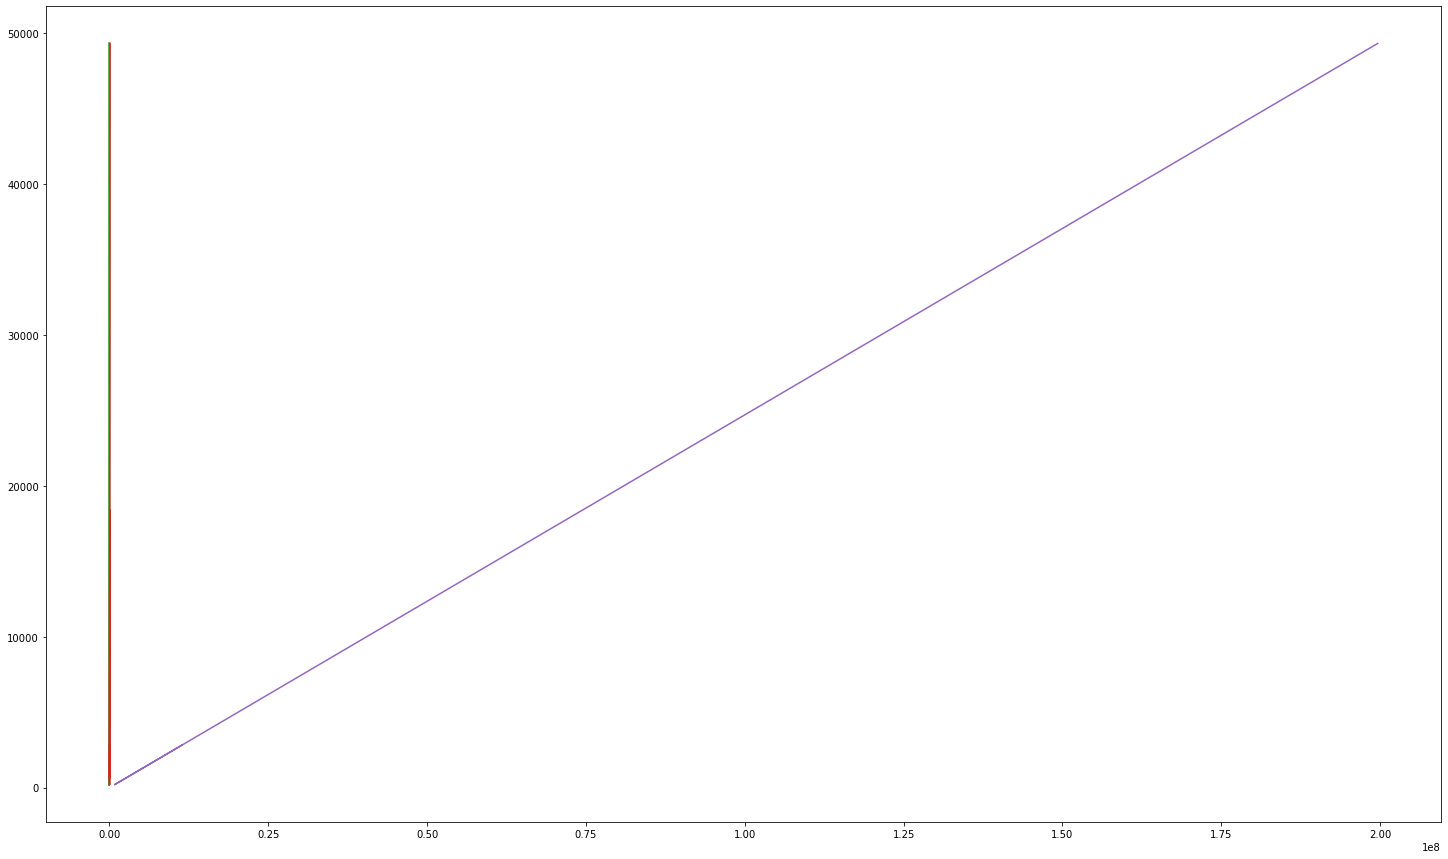

In [131]:
# Plot average fire size per year from 1878-2019

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

plt.plot(fireYear, fireAC);